# Make pretty "images" showing the color magnitude diagrams for SDSS galaxies

The SDSS DR 7 photometry (> 100,000 randomly seelcted galaxies within the full >1 million galaxy sample) will be used to generate galaxy CMD. We don't do careful filtering here (i.e., there may still be AGN in the sample) but we use the kcorrected (i.e., galaxy SED) magnitudes where available, aiming to select mostly galaxies well-fit by galaxy templates. The goal here is to show where typical galaxies (z>0.01) reside in color-magnitude space. We will overlay our sample of Swift pair galaxies, drawn from the Barton paper of close pairs of galaxies, on the CMD as a comparison.   

#### initialize with import libraries

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import sys, os
import astropy.io.fits as fits
import numpy as np
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

# ignore runtime warnings

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [3]:
sdss = fits.open('data/sdssphot_random.fits')
data=sdss[1].data

## Initialize sample: 
Get colors and absolute magnitudes from this SDSS-DR7 sample

In [4]:
# Get required data
z=data['z']
d_l_pc=cosmo.luminosity_distance(z).value*1.e6

# get apparent magnitudes
mag=data['kcor_mag']
gmag=mag[:,0]
rmag=mag[:,1]
imag=mag[:,2]

In [5]:
# determine where the values are appropriate. 
#good = np.where((gmag > 0) & (rmag > 0) & (imag > 0))
good=np.where((z>0.01) & ( gmag > 0 ) & ( rmag > 0 ) & ( imag > 0 ) & ( d_l_pc > 0))
print("There are %i galaxies included in our final analysis... " % np.size(good))

There are 91871 galaxies included in our final analysis... 


In [6]:
# for good galaxies, calculate remaining useful data:
dm=5*(np.log10(d_l_pc[good])-1)  # distance modulus

# absolute magnitudes
g_absmag = gmag[good] - dm
r_absmag = rmag[good] - dm
i_absmag = imag[good] - dm

col_g_r = g_absmag - r_absmag


## Make Plot:
Now that we have all the data for the plot, make 2D histogram showing color-magnitude diagram for the ramdom SDSS galaxies

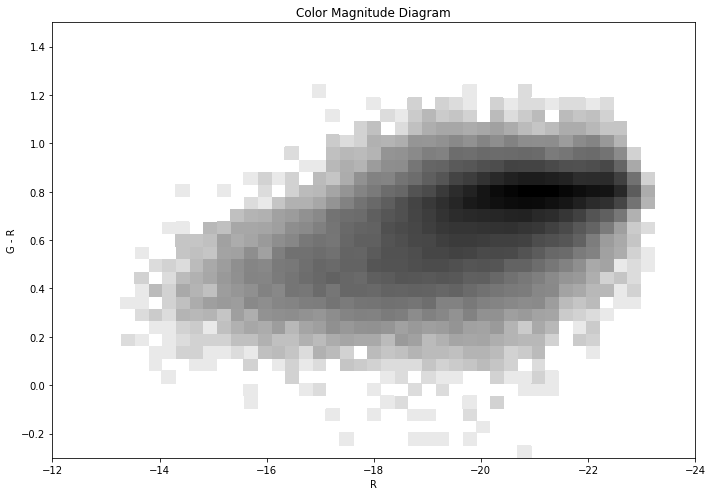

In [8]:
import random
n = 100
x = r_absmag 
y = col_g_r  
  

# Creating bins 
x_min = -24  #np.min(x) 
x_max = -12  #np.max(x) 
  
y_min = -0.3   #np.min(y) 
y_max = 1.5   #np.max(y) 
  
nbin_x = round(abs(x_max-x_min)/0.25)
nbin_y = round(abs(y_max-y_min)/0.05)

x_bins = np.linspace(x_min, x_max, nbin_x) 
y_bins = np.linspace(y_min, y_max, nbin_y) 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
# Creating plot 
plt.hist2d(x, y, bins =[x_bins, y_bins], norm=mpl.colors.LogNorm(), cmap=mpl.cm.gray_r) 
plt.title("Color Magnitude Diagram") 
  
ax.set_xlabel('R')  
ax.set_ylabel('G - R')  
  
ax.invert_xaxis()

# show plot 
plt.tight_layout()  
plt.show() 
    
    

### Next steps: <font color=red> TO DO! </font> 
I would like Emma to add the points for the full Barton sample with small (blue?)points and then our specific sample of ~ 30 pairs with larger points (red?) to show how these compare with parent sample. Note, we might have to change the magnitude choices used since GRI may not be available for the Barton sample. 